In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
sys.path.append('/home/moritz/Desktop/programming/viewer')
from viewer.viewer_src import *
from utils.montages import full_bipolar_montage

In [14]:
def get_sample2(df,target):
    # Calculate absolute difference between col1 and target 
    diff = (df['preds'] - target).abs()
    # Find index of minimum difference 
    idx = diff.idxmin()
    # Get row for minimum difference 
    row = df.loc[idx]
    return row

In [15]:
def get_sample(df,low,high,n):
    return df[(df.preds>low)&(df.preds<=high)].iloc[0:n]

In [16]:
def get_samples(df,n):
    samples = []
    for target in np.arange(0,1.001,1/n):
        sample = get_sample2(df,target)
        samples.append(sample)
    df = pd.DataFrame(samples)
    df.reset_index(inplace=True,drop=True)
    return df

In [28]:
def load_and_cut_signal(path_signal,start,end,Fq):
    signal = np.load(path_signal)
    signal=signal[:,start*Fq:end*Fq]
    return signal

In [29]:
def get_dataframe(label,path_pred):
    df = pd.read_csv(path_pred)
    agreement = df.total_votes_received >= 8
    positive = df.fraction_of_yes >= 7/8
    negative = df.fraction_of_yes == 0
    mode = df.Mode == 'Test'
    if label =='positive':
        df = df[positive&agreement&mode].sort_values('preds',ascending=False)
    elif label =='negative':
        df = df[negative&mode].sort_values('preds',ascending=False)
    return df

In [30]:
def build_viewer_module(ax,montage_module,x_start,x_end,Fq):
    y_labels=montage_module.montages[0].y_labels
    y_locations=montage_module.montages[0].y_locations
    viewer_module = init_viewer_module(ax,y_locations,y_labels,x_start=x_start,x_end=x_end,Fq=Fq)
    return viewer_module

In [31]:
def add_signal(path_signal,viewer_modules,montage_module):
    signal = load_and_cut_signal(path_signal)
    signal = montage_module.montages[0](signal)
    update_channels_with_signal(signal=signal,channel_lines=viewer_modules[i].channel_lines,y_locations=viewer_modules[i].y_locations) 


In [32]:
def process_ticks_and_title(ax,i,title):
    if i !=0:
        ax.set_yticks([])
        ax.set_yticks([])
    ax.set_xticks([])
    ax.set_title(title)
    return ax

In [33]:
def init_info(label,n,path_pred):
    df = get_dataframe(label,path_pred)
    sub_df = get_samples(df,n)
    path_files = '/media/moritz/internal_expansion/Data/Bonobo/cluster_center/'
    path_signals=list(path_files + sub_df.event_file+'.npy')
    titles = list(sub_df.preds.round(2).astype(str))
    subtitles = list(sub_df.event_file)
    Fq = 128
    return path_signals, titles, subtitles,Fq

TypeError: load_and_cut_signal() missing 3 required positional arguments: 'start', 'end', and 'Fq'

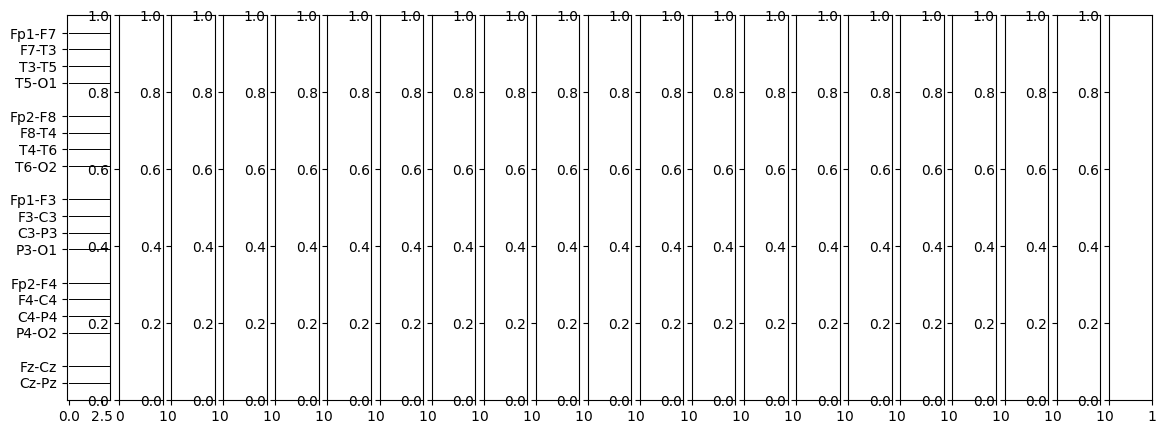

In [34]:
n = 20
x_start,x_end = 0,3
signal_start,signal_end = 6,9
path_pred = '/home/moritz/Desktop/programming/SpikeDeletion/Models/specialized_two_referential/pred.csv'
sample_type = 'positive'

# init info 
path_signals, titles, subtitles,Fq = init_info(sample_type,n=n,path_pred=path_pred)
# init figure
fig, axs = plt.subplots(1,n+1,figsize = (14,5))
# init montage and viewer
montage_module = init_montage_module(montages= [full_bipolar_montage])
viewer_modules = []
# create figure
for i in range(n+1):
    viewer_module = build_viewer_module(axs[i],montage_module,x_start=x_start,x_end=x_end,Fq=Fq)
    viewer_modules.append(viewer_module)
    add_signal(path_signals[i],viewer_modules,montage_module,start,end,Fq)
    process_ticks_and_title(axs[i],i,titles[i])
fig.tight_layout()
fig.savefig(f'{sample_type}.png')